<a href="https://colab.research.google.com/github/chadunduraa/TITANIC-SURVIVAL/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

# Data manipulation and analysis
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style

# Algorithms
from sklearn.ensemble import ExtraTreesClassifier

# Set max_features to a specific integer value, e.g., 10
auto=42
et_classifier = ExtraTreesClassifier(max_features=auto)
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
import pandas as pd

train_df = pd.read_csv('/content/Task2-train.csv')
test_df = pd.read_csv('/content/Task2-test.csv')

train_df['train_test'] = 1
test_df['train_test'] = 0
# test_df['Survived'] = np.NaN
all_data = pd.concat([train_df, test_df])

%matplotlib inline
all_data.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [ ]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [ ]:
test_df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [ ]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(13)


,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0


In [ ]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype=object)

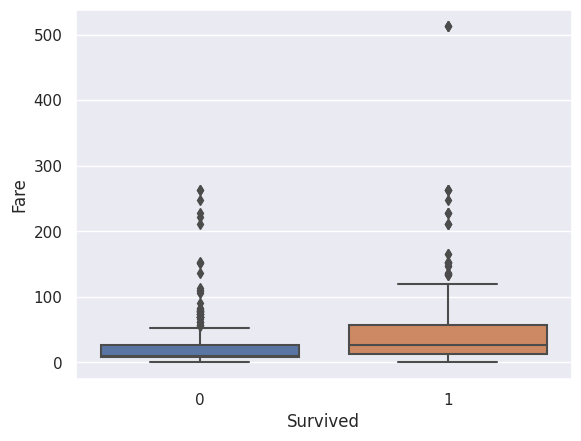

In [ ]:
sns.boxplot(x='Survived',y='Fare',data=train_df);


In [ ]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype=object)

In [ ]:
train_df[train_df['Fare']>300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,1
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,1
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,1


In [ ]:
train_df[train_df['Name'].str.contains("Capt")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S,1


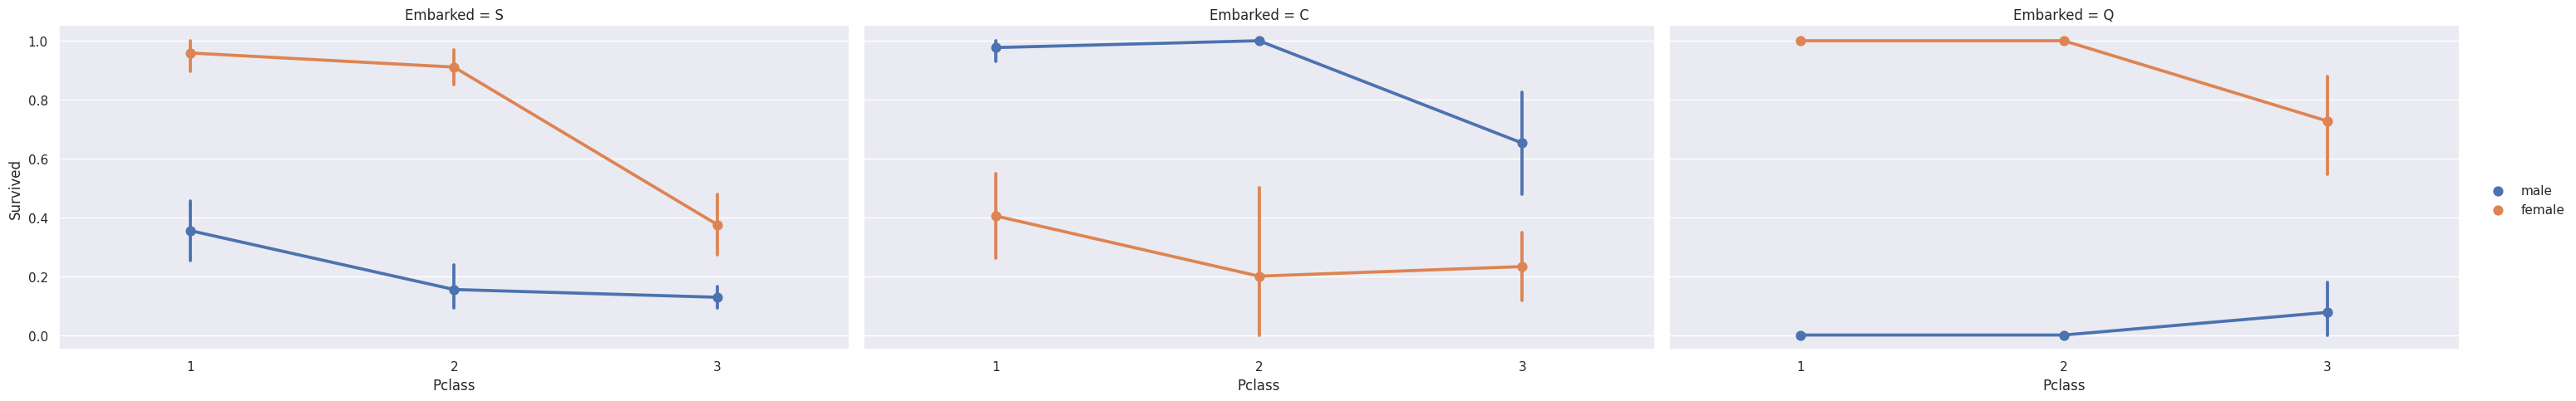

In [ ]:
FacetGrid = sns.FacetGrid(train_df, col='Embarked', height=5, aspect=2)

# Use errorbar instead of ci for the pointplot
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep', order=None, hue_order=None, errorbar=('ci', 95.0))

# Add legend
FacetGrid.add_legend()

In [ ]:
data = [train_df, test_df]

for dataset in data:
    # Fill missing values with a default value (e.g., -1)
    dataset['Fare'].fillna(-1, inplace=True)

    # Apply your fare binning logic (similar to your original code)
    dataset.loc[dataset['Fare'] <= 7, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7) & (dataset['Fare'] <= 8), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 8) & (dataset['Fare'] <= 14), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 14) & (dataset['Fare'] <= 26), 'Fare'] = 3
    dataset.loc[(dataset['Fare'] > 26) & (dataset['Fare'] <= 52), 'Fare'] = 4
    dataset.loc[dataset['Fare'] > 52, 'Fare'] = 5

    # Convert the 'Fare' column to integer data type
    dataset['Fare'] = dataset['Fare'].astype(int)


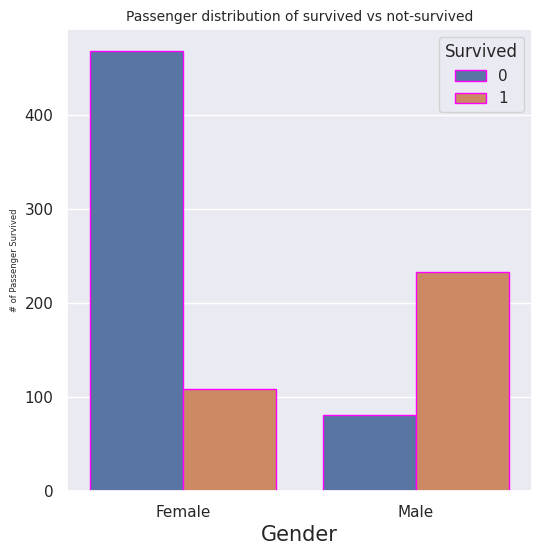

In [ ]:
sns.set(style='darkgrid')
plt.subplots(figsize = (6,6))
ax=sns.countplot(x='Sex', data = train_df, hue='Survived', edgecolor=(1,0,1), linewidth=1)

# Fixing title, xlabel and ylabel
plt.title('Passenger distribution of survived vs not-survived', fontsize=10)
plt.xlabel('Gender', fontsize=15)
plt.ylabel("# of Passenger Survived", fontsize = 6)
labels = ['Female', 'Male']

# Fixing xticks.
plt.xticks(sorted(train_df.Survived.unique()),labels);

In [ ]:
train_df.groupby(['Sex']).mean(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
Sex,,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,3.194268,1.0
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,2.440208,1.0


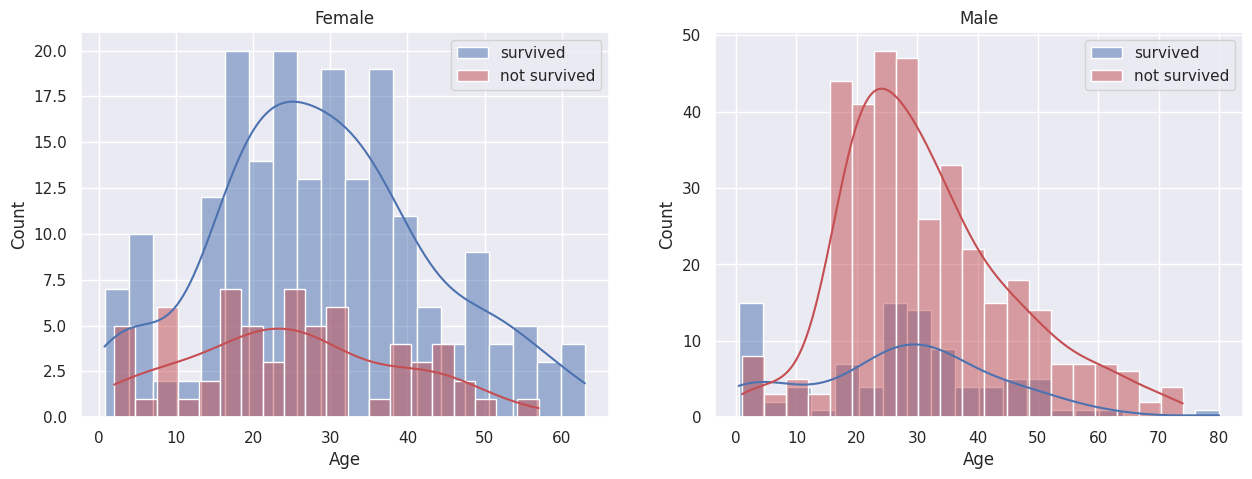

In [ ]:

train_df.groupby(['Sex', 'Pclass']).mean(numeric_only=True)
survived = 'survived'
not_survived = 'not survived'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']

# Plot Female Survived vs Not-Survived distribution
ax = sns.histplot(women[women['Survived']==1].Age.dropna(), bins=20, label = survived, ax = axes[0],color='b', kde=True)
ax = sns.histplot(women[women['Survived']==0].Age.dropna(), bins=20, label = not_survived, ax = axes[0],color='r', kde=True)
ax.legend()
ax.set_title('Female')

# Plot Male Survived vs Not-Survived distribution
ax = sns.histplot(men[men['Survived']==1].Age.dropna(), bins=20, label = survived, ax = axes[1],color='b', kde=True)
ax = sns.histplot(men[men['Survived']==0].Age.dropna(), bins=20, label = not_survived, ax = axes[1],color='r', kde=True)
ax.legend()
ax.set_title('Male');


In [ ]:
train_df[train_df['Age']<18].groupby(['Sex','Pclass']).mean(numeric_only=True)

PassengerId  Survived        Age     SibSp     Parch      Fare  \
Sex    Pclass                                                                   
female 1        525.375000  0.875000  14.125000  0.500000  0.875000  4.875000   
       2        369.250000  1.000000   8.333333  0.583333  1.083333  3.416667   
       3        374.942857  0.542857   8.428571  1.571429  1.057143  2.714286   
male   1        526.500000  1.000000   8.230000  0.500000  2.000000  5.000000   
       2        527.818182  0.818182   4.757273  0.727273  1.000000  3.272727   
       3        437.953488  0.232558   9.963256  2.069767  1.000000  2.953488   

               train_test  
Sex    Pclass              
female 1              1.0  
       2              1.0  
       3              1.0  
male   1              1.0  
       2              1.0  
       3              1.0

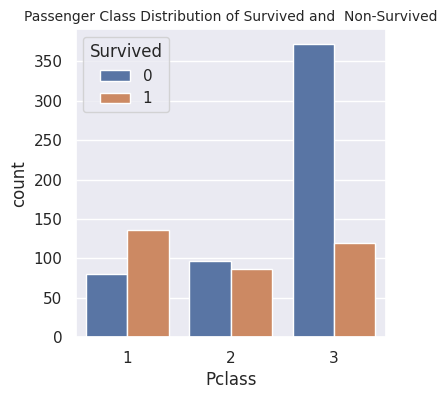

In [ ]:
plt.subplots(figsize = (4,4))
ax=sns.countplot(x='Pclass',hue='Survived',data=train_df)
plt.title("Passenger Class Distribution of Survived and  Non-Survived", fontsize = 10);

([<matplotlib.axis.XTick at 0x7f5e713866e0>,
 [Text(1, 0, 'First'), Text(2, 0, 'Second'), Text(3, 0, 'Third')])

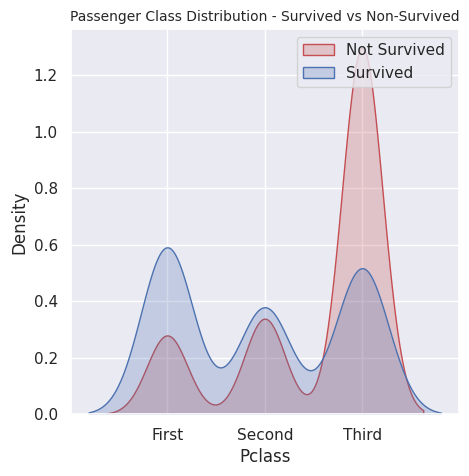

In [ ]:
plt.subplots(figsize=(5, 5))
ax = sns.kdeplot(train_df.loc[train_df['Survived'] == 0, 'Pclass'], fill=True, color='r', label='Not Survived')
ax.legend()
ax = sns.kdeplot(train_df.loc[train_df['Survived'] == 1, 'Pclass'], fill=True, color='b', label='Survived')
ax.legend()

plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize=10)
labels = ['First', 'Second', 'Third']
plt.xticks(sorted(train_df['Pclass'].unique()), labels)

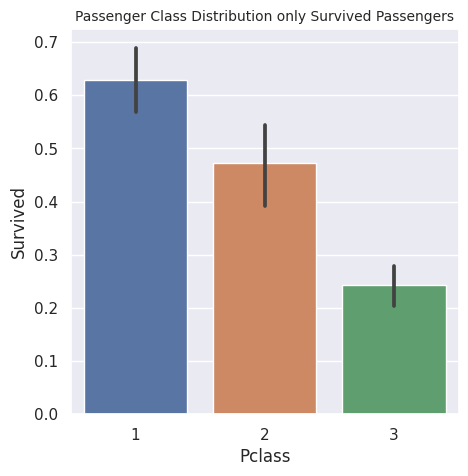

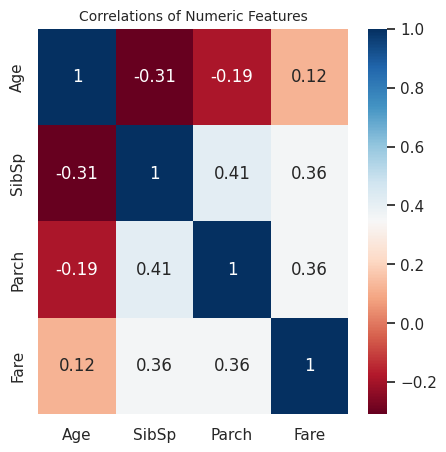

In [ ]:
plt.subplots(figsize = (5,5))
sns.barplot(x='Pclass', y='Survived', data=train_df);
plt.title("Passenger Class Distribution only Survived Passengers", fontsize = 10);
df_num = train_df[['Age','SibSp','Parch','Fare']]
df_cat = train_df[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]
plt.subplots(figsize = (5,5))
sns.heatmap(df_num.corr(), annot=True,cmap="RdBu")
plt.title("Correlations of Numeric Features", fontsize = 10);


In [ ]:
train_df = train_df.drop(['PassengerId'], axis=1)
train_df.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,5,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,1,NaN,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,5,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2,NaN,S,1


In [ ]:
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

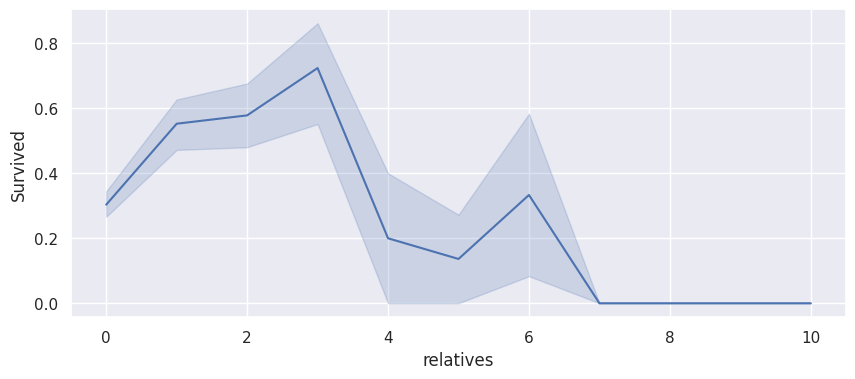

In [ ]:
plt.subplots(figsize = (10,4))
ax = sns.lineplot(x='relatives',y='Survived', data=train_df)

In [ ]:
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()

    # Compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)

    # Fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)

In [ ]:
train_df["Age"].isnull().sum()

0

In [ ]:
train_df['Embarked'].describe()


count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [ ]:
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)
train_df['Embarked'].isnull().sum()

0

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Survived    891 non-null    int64 
 1   Pclass      891 non-null    int64 
 2   Name        891 non-null    object
 3   Sex         891 non-null    object
 4   Age         891 non-null    int64 
 5   SibSp       891 non-null    int64 
 6   Parch       891 non-null    int64 
 7   Ticket      891 non-null    object
 8   Fare        891 non-null    int64 
 9   Embarked    891 non-null    object
 10  train_test  891 non-null    int64 
 11  relatives   891 non-null    int64 
 12  not_alone   891 non-null    int64 
 13  Deck        891 non-null    int64 
dtypes: int64(10), object(4)
memory usage: 97.6+ KB


In [ ]:
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}

for dataset in data:
    # Extract titles
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False)

    # Replace titles with a more common title or as Other
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr','Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

    # Convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)

    # Filling NaN with 0 just to be safe
    dataset['Title'] = dataset['Title'].fillna(0)


In [ ]:
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
# Checking results
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,train_test,relatives,not_alone,Deck,Title
0,0,3,male,22,1,0,A/5 21171,1,S,1,1,0,8,1
1,1,1,female,38,1,0,PC 17599,5,C,1,1,0,3,3
2,1,3,female,26,0,0,STON/O2. 3101282,1,S,1,0,1,8,2
3,1,1,female,35,1,0,113803,5,S,1,1,0,3,3
4,0,3,male,35,0,0,373450,2,S,1,0,1,8,1


In [ ]:
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,train_test,relatives,not_alone,Deck,Title
0,0,3,0,22,1,0,A/5 21171,1,S,1,1,0,8,1
1,1,1,1,38,1,0,PC 17599,5,C,1,1,0,3,3
2,1,3,1,26,0,0,STON/O2. 3101282,1,S,1,0,1,8,2
3,1,1,1,35,1,0,113803,5,S,1,1,0,3,3
4,0,3,0,35,0,0,373450,2,S,1,0,1,8,1


In [ ]:
train_df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [ ]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,train_test,relatives,not_alone,Deck,Title
0,0,3,0,22,1,0,1,S,1,1,0,8,1
1,1,1,1,38,1,0,5,C,1,1,0,3,3
2,1,3,1,26,0,0,1,S,1,0,1,8,2
3,1,1,1,35,1,0,5,S,1,1,0,3,3
4,0,3,0,35,0,0,2,S,1,0,1,8,1


In [ ]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)
train_df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,train_test,relatives,not_alone,Deck,Title
0,0,3,0,22,1,0,1,0,1,1,0,8,1
1,1,1,1,38,1,0,5,1,1,1,0,3,3
2,1,3,1,26,0,0,1,0,1,0,1,8,2
3,1,1,1,35,1,0,5,0,1,1,0,3,3
4,0,3,0,35,0,0,2,0,1,0,1,8,1


In [ ]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6
# Checking the distribution
train_df['Age'].value_counts()

6    165
4    156
5    155
3    134
2    119
1     94
0     68
Name: Age, dtype: int64

In [ ]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,train_test,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,1,0,1,1,0,8,1
1,1,1,1,5,1,0,5,1,1,1,0,3,3
2,1,3,1,3,0,0,1,0,1,0,1,8,2
3,1,1,1,5,1,0,5,0,1,1,0,3,3
4,0,3,0,5,0,0,2,0,1,0,1,8,1


In [ ]:
# Use qcut with the 'duplicates' parameter set to 'drop'
fare_bins = pd.qcut(train_df['Fare'], q=6, duplicates='drop')

# Display the result
print(fare_bins)

0      (-0.001, 1.0]
1       (4.667, 5.0]
2      (-0.001, 1.0]
3       (4.667, 5.0]
4         (1.0, 2.0]
           ...      
886       (1.0, 2.0]
887     (3.0, 4.667]
888       (2.0, 3.0]
889     (3.0, 4.667]
890    (-0.001, 1.0]
Name: Fare, Length: 891, dtype: category
Categories (5, interval[float64, right]): [(-0.001, 1.0] < (1.0, 2.0] < (2.0, 3.0] < (3.0, 4.667] <
                                           (4.667, 5.0]]


In [ ]:
data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7) & (dataset['Fare'] <= 8), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 8) & (dataset['Fare'] <= 14), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 14) & (dataset['Fare'] <= 26), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 26) & (dataset['Fare'] <= 52), 'Fare']   = 4
    dataset.loc[dataset['Fare'] > 52, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)
# Checking the dataset
train_df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,train_test,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,0,0,1,1,0,8,1
1,1,1,1,5,1,0,0,1,1,1,0,3,3
2,1,3,1,3,0,0,0,0,1,0,1,8,2


In [ ]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()


In [ ]:
import pandas as pd
import numpy as np

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)
    return df[indices_to_keep].astype(np.float64)

In [ ]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)

Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

# Print score
print(round(acc_sgd,2,), "%")

65.88 %


In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

# Print score
print(round(acc_decision_tree,2,), "%")

90.57 %


In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

# Print score
print(round(acc_random_forest,2,), "%")


90.57 %


In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

# Print score
print(round(acc_log,2,), "%")

81.93 %


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

# Print score
print(round(acc_knn,2,), "%")

87.21 %


In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

Y_pred = gaussian.predict(X_test)

acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

# Print score
print(round(acc_gaussian,2,), "%")

79.12 %


In [ ]:
results = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression',
              'Random Forest', 'Naive Bayes',
              'Stochastic Gradient Decent',
              'Decision Tree'],
    'Score': [acc_knn, acc_log,
              acc_random_forest, acc_gaussian,
              acc_sgd, acc_decision_tree]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
90.57,Random Forest
90.57,Decision Tree
87.21,KNN
81.93,Logistic Regression
79.12,Naive Bayes
65.88,Stochastic Gradient Decent


In [ ]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())


Scores: [0.75555556 0.76404494 0.75280899 0.83146067 0.80898876 0.79775281
 0.78651685 0.75280899 0.85393258 0.82022472]
Mean: 0.7924094881398253
Standard Deviation: 0.03423606138028034


In [ ]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# Create the RandomForestClassifier with oob_score set to True
random_forest = RandomForestClassifier(oob_score=True, n_estimators=100)  # Set other hyperparameters as needed
importances.head(12)

,importance
feature,
Title,0.229
Sex,0.191
Age,0.148
Deck,0.115
Pclass,0.105
relatives,0.074
Embarked,0.054
SibSp,0.041
Parch,0.029


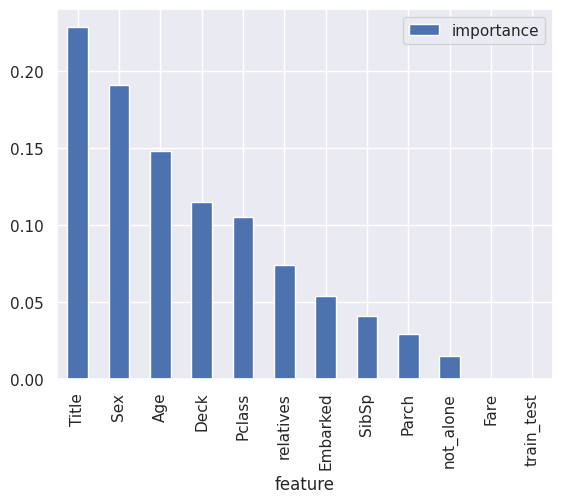

In [ ]:
importances.plot.bar();

In [ ]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

# Print scores
print(round(acc_random_forest,2,), "%")

90.57 %


In [ ]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(1)



,importance
feature,
Title,0.232


In [ ]:
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 78.9 %


In [ ]:
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create the RandomForestClassifier with specified hyperparameters
random_forest = RandomForestClassifier(criterion="gini",
                                       max_depth=20,
                                       max_features='sqrt',
                                       min_samples_leaf=3,
                                       min_samples_split=2,
                                       n_estimators=450,
                                       oob_score=True,
                                       random_state=1,
                                       n_jobs=-1)

# Fit the model to the training data
random_forest.fit(X_train, Y_train)

# Make predictions on the test data
Y_prediction = random_forest.predict(X_test)

# Calculate the OOB score
oob_score = round(random_forest.oob_score_, 4) * 100
print("OOB score:", oob_score, "%")

OOB score: 82.83 %


In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[496,  53],
       [ 96, 246]])

In [ ]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.822742474916388
Recall: 0.7192982456140351


In [ ]:
from sklearn.metrics import f1_score
f1_score(Y_train, predictions)



0.7675507020280813

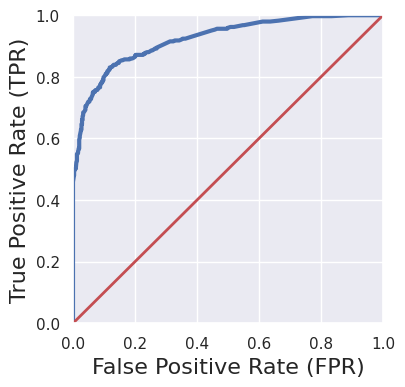

In [ ]:
from sklearn.metrics import roc_curve

# Compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)

# Plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=3, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=2)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(4, 4))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9226451069994354
